In [1]:
import numpy as np
from collections import Counter

<h1>Linear Regression Model</h1>

In [2]:
class LinearRegression:
    def __init__(self,l=0.001,epochs=5000):
        self.l = l
        self.epochs = epochs
        self.weight = None
        self.bias = None

    def fit(self,X,y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            y_prediction = np.dot(X, self.weights) + self.bias
            d_m = (-2/n_samples)*np.dot(X.T, (y-y_prediction))
            d_c = (-2/n_samples)*np.sum((y-y_prediction))
            self.weights = self.weights - self.l*d_m
            self.bias = self.bias - self.l*d_c

    def predict(self, X):
        linear_predictions = np.dot(X, self.weights) + self.bias
        return linear_predictions
    
    def mse(self,Y,y):
        return np.mean((Y-y)**2)
    

<h1>Logistic Regression Model</h1>

In [3]:
class LogisticRegression:
    def __init__(self, l=0.001, epochs=1000):
        self.l = l
        self.epochs = epochs
        self.weights = None
        self.bias = None
    
    def fit(self,X,y):
        n_samples, n_features = X.shape 
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            linear_predictions = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(linear_predictions)

            d_w = (1/n_samples) * np.dot(X.T, (predictions - y))
            d_b = (1/n_samples) * np.sum((predictions - y))

            self.weights = self.weights - self.l*d_w
            self.bias = self.bias - self.l*d_b

    def predict(self, X):
        linear_predictions = np.dot(X, self.weights) + self.bias
        y_predictions = self.sigmoid(linear_predictions)
        predictions = [0 if y<=0.5 else 1 for y in y_predictions]
        return predictions

    def sigmoid(self,x):
        return 1/(1+np.exp(-x))

<h1>K Nearest Neighbours Model</h1>

In [64]:
class KNearestNeighbours:
    def __init__(self, k=3):
        self.k=k

    def euclidean_distance(self,x1,x2):
        distance = np.sqrt(np.sum((x1-x2)**2))
        return distance

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self,X):
        predictions = [self._predict(x) for x in X]
        return predictions

    def _predict(self,x):
        distances = [self.euclidean_distance(x,x_train) for x_train in self.X_train]

        k_indices = np.argsort(distances)[:self.k]
        k_nearest_label = [self.y_train[i] for i in k_indices]

        most_commom = Counter(k_nearest_label).most_common()
        return most_commom[0][0]

<h1>Support Vector Machine Model</h1>

In [6]:
class SVM:
    def __init__(self,l=0.001,lam=0.01,epochs=1000):
        self.l = l
        self.lam = lam
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self,X,y):
        n_samples, n_features = X.shape
        y = np.where(y<= 0,-1,1)

        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            for i,x in enumerate(X):
                condition = y[i]*(np.dot(x,self.weights)-self.bias)
                if condition:
                    self.weights -= self.l * (2*self.lam*self.weights)
                else:
                    self.weights -= self.l * (2*self.lam*self.weights - np.dot(x,y[i]))
                    self.bias -= self.l* y[i]

<h1>Accuracy Calculator</h1>

In [115]:
def modelAccuracy(Y,y):
    return "Accuracy: "+str(round(((np.sum(y == Y) / len(Y)) * 100),4))+"%"

<h1>Implementation of all Models:</h1>
step 1: Import required dataset.<br>
step 2: Identify features.<br>
step 3: Standardize all the data.<br>
step 4: Preform train test split on dataset.<br>

<h1>Import all Module</h1>

In [21]:

from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

<h1>Linear Regression</h1>

Read data from csv file, Housing dataset to predict price from area.

In [15]:
df = pd.read_csv("./Linear Regression/Housing.csv")
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


normalizing data

In [61]:
X = (df['area']-np.mean(df['area']))/np.std(df['area'])
y = (df['price']-np.mean(df['price']))/np.std(df['price'])
X = X.values.reshape(-1,1)
print(X.shape)
print(y.shape)

(545, 1)
(545,)


splitting training and testing dataset

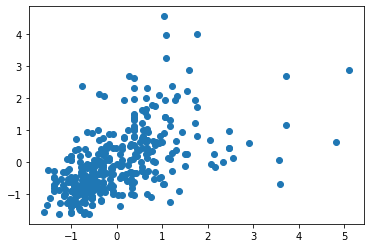

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)
plt.scatter(X_train,y_train)

training the model

In [62]:
model = LinearRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)


calculating the mean error

In [63]:
print("MSE: ",model.mse(y_test,predictions))

MSE:  0.6955756702727154


plotting regression line

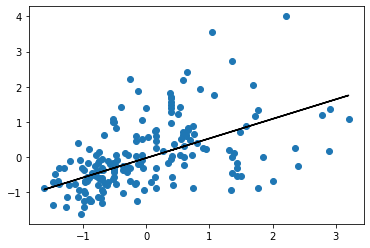

In [60]:
plt.scatter(X_test, y_test)
plt.plot(X_test,predictions,color='black')

<h1>Logistic Regression</h1>

Read data from csv file, Diabetes dataset to predict if a person has diabetes from age and glucose.

In [68]:
df = pd.read_csv('./Logistic Regression/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
103,1,81,72,18,40,26.6,0.283,24,0
104,2,85,65,0,0,39.6,0.930,27,0
105,1,126,56,29,152,28.7,0.801,21,0
106,1,96,122,0,0,22.4,0.207,27,0


selecting features and normalizing data

In [104]:
X = df.iloc[:,[1,7]].values
y = df.iloc[:,-1:].values.reshape(-1)

splitting training and testing dataset

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)
print(X_train.shape,y_train.shape)

(72, 2) (72,)


training the model

In [106]:
model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

calculating the moel accuracy

In [116]:
print(modelAccuracy(y_test,predictions))

Accuracy: 47.2222%
